# Домашнее задание Анализ результатов



1. Отфильтруйте датасет по своей гипотезе. Используйте метрику, которая описана в блоке “Ожидаем”
2. Постройте периодический p-value по выбранной метрике (сплит уже произведен)
    * Разбейте общее количество наблюдений на 7 участков (используйте столбец даты)
    * Для каждого участка используйте встроенную функцию ТТЕСТ() в excel, чтобы сравнить тестовую и котрольную группы
    * 7 полученных значений p-value визуализируйте на графике
3. На основе графика сделайте вывод о значимости результатов.


**фичa для анализа:**

Если юзер Android нажимает “отменить”, предлагать промокод в случае НЕ отмены

Ожидаем: ниже отмены на Android устройствах

In [1]:
#подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
#загружаем файл
df = pd.read_csv('post_abtest_data.csv', sep=',')

In [3]:
df.head(20)

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
0,867689,2020-05-28,1,Control,1,1,no surge,Android,0.0,1.0,Control
1,867689,2020-05-29,1,Control,1,0,surge,iOS,NaN,NaN,Control
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control
3,752172,2020-05-29,1,Control,1,1,surge,Android,0.0,1.0,Control
4,752172,2020-05-28,1,Control,1,1,no surge,iOS,0.0,0.0,Control
5,486559,2020-05-25,1,Control,1,0,surge,Android,NaN,NaN,Control
6,486559,2020-05-31,1,Control,1,1,no surge,iOS,0.0,0.0,Control
7,486559,2020-05-30,1,Control,1,1,no surge,Android,0.0,0.0,Control
8,486559,2020-05-28,1,Control,1,0,surge,iOS,NaN,NaN,Control
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            101500 non-null  int64  
 1   date               101500 non-null  object 
 2   app_opened         101500 non-null  int64  
 3   group              101500 non-null  object 
 4   price_seen         101500 non-null  int64  
 5   order_made         101500 non-null  int64  
 6   surge              92358 non-null   object 
 7   os                 101500 non-null  object 
 8   user_cancelled     70157 non-null   float64
 9   city_center_order  70157 non-null   float64
 10  groups             101500 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.5+ MB


проверим значения в столбцах user_cancelled и city_center_order 

In [5]:
df['user_cancelled'].unique()

array([ 0., nan,  1.])

In [6]:
df['city_center_order'].unique()

array([ 1., nan,  0.])

т.е. в столбцах user_cancelled и city_center_order значение NaN соответствует данным, по которым не было совершено заказа.

In [7]:
#фильтр для пользователей андроид, которые делали заказ
df_android = df[(df['os'] == 'Android') & (df['order_made'] == 1)]
df_android

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups
0,867689,2020-05-28,1,Control,1,1,no surge,Android,0.0,1.0,Control
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control
3,752172,2020-05-29,1,Control,1,1,surge,Android,0.0,1.0,Control
7,486559,2020-05-30,1,Control,1,1,no surge,Android,0.0,0.0,Control
9,486559,2020-05-29,1,Control,1,1,no surge,Android,0.0,0.0,Control
...,...,...,...,...,...,...,...,...,...,...,...
101490,600165,2020-05-25,1,Control,1,1,no surge,Android,0.0,1.0,Control
101491,556405,2020-05-29,1,Control,1,1,no surge,Android,0.0,1.0,Control
101493,442716,2020-05-26,1,Test,1,1,surge,Android,0.0,1.0,Test
101497,352605,2020-05-26,1,Test,1,1,no surge,Android,0.0,1.0,Test


In [8]:
#группируем по ID, группе теста и дате с агрегацией на количество отмен
df_android = df_android.groupby(['user_id','groups','date']).agg({'user_cancelled':'sum'}).reset_index()
df_android

,user_id,groups,date,user_cancelled
0,100093,Test,2020-05-25,0.0
1,100118,Test,2020-05-29,1.0
2,100118,Test,2020-05-30,0.0
3,100134,Test,2020-05-27,1.0
4,100134,Test,2020-05-31,0.0
...,...,...,...,...
37416,999945,Test,2020-05-30,0.0
37417,999962,Control,2020-05-25,0.0
37418,999978,Control,2020-05-26,0.0
37419,999978,Control,2020-05-29,0.0


In [9]:
# какие даты есть в df_android
df_android.date.unique() 

array(['2020-05-25', '2020-05-29', '2020-05-30', '2020-05-27',
       '2020-05-31', '2020-05-28', '2020-05-26'], dtype=object)

In [10]:
#смотрим длину групп 1 и 2
len(df_android[df_android['groups']=='Test']), len(df_android[df_android['groups']=='Control'])

(18899, 18522)

In [11]:
# делим датасет на 7 частей. Для выборки взяла по 2500 (т.к. 18522/7=2646) для равенства контрольно-тестовых групп.
day_1_control = df_android[(df_android.date == '2020-05-25') & (df_android.groups == 'Control')]['user_cancelled'].dropna().sample(n=2500)
day_1_test = df_android[(df_android.date == '2020-05-25') & (df_android.groups == 'Test')]['user_cancelled'].dropna().sample(n=2500)

In [12]:
day_2_control = df_android[(df_android.date == '2020-05-26') & (df_android.groups == 'Control')]['user_cancelled'].dropna().sample(n=2500)
day_2_test = df_android[(df_android.date == '2020-05-26') & (df_android.groups == 'Test')]['user_cancelled'].dropna().sample(n=2500)

In [13]:
day_3_control = df_android[(df_android.date == '2020-05-27') & (df_android.groups == 'Control')]['user_cancelled'].dropna().sample(n=2500)
day_3_test = df_android[(df_android.date == '2020-05-27') & (df_android.groups == 'Test')]['user_cancelled'].dropna().sample(n=2500)

In [14]:
day_4_control = df_android[(df_android.date == '2020-05-28') & (df_android.groups == 'Control')]['user_cancelled'].dropna().sample(n=2500)
day_4_test = df_android[(df_android.date == '2020-05-28') & (df_android.groups == 'Test')]['user_cancelled'].dropna().sample(n=2500)

In [15]:
day_5_control = df_android[(df_android.date == '2020-05-29') & (df_android.groups == 'Control')]['user_cancelled'].dropna().sample(n=2500)
day_5_test = df_android[(df_android.date == '2020-05-29') & (df_android.groups == 'Test')]['user_cancelled'].dropna().sample(n=2500)

In [16]:
day_6_control = df_android[(df_android.date == '2020-05-30') & (df_android.groups == 'Control')]['user_cancelled'].dropna().sample(n=2500)
day_6_test = df_android[(df_android.date == '2020-05-30') & (df_android.groups == 'Test')]['user_cancelled'].dropna().sample(n=2500)

In [17]:
day_7_control = df_android[(df_android.date == '2020-05-31') & (df_android.groups == 'Control')]['user_cancelled'].dropna().sample(n=2500)
day_7_test = df_android[(df_android.date == '2020-05-31') & (df_android.groups == 'Test')]['user_cancelled'].dropna().sample(n=2500)

In [18]:
#проверяем длину
len(day_1_control), len(day_1_test)

(2500, 2500)

In [19]:
# заводим списки для удобства перебирания в цикле
test = [day_1_test,day_2_test,day_3_test,day_4_test,day_5_test,day_6_test,day_7_test] 

In [20]:
control = [day_1_control,day_2_control,day_3_control,day_4_control,day_5_control,day_6_control,day_7_control] 

In [21]:
# рассчитываем p-value
Pvalue = []
for i in range(7):
    T, p = stats.ttest_ind(control[i], test[i])
    Pvalue.append(p)

In [22]:
# p-value списком по дням
Pvalue 

[0.022735123510455965,
 5.538897914833171e-05,
 2.471355470731366e-07,
 4.5406355815745175e-06,
 1.6354171282822493e-06,
 4.0267629419061424e-07,
 1.4717003252883856e-05]

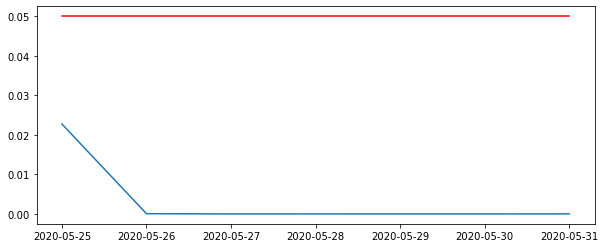

In [23]:
# строим график по p-value по дням, где красная линия это alpha, а синяя - периодический p-value
alpha=0.05

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.plot(sorted(df_android['date'].unique()), Pvalue)
ax.plot(sorted(df_android['date'].unique()), [alpha]*7, color='red')

**ВЫВОД:** p-value стабильно ниже alpha, следовательно, предложение промокода пользователям Android при нажатии кнопки отмены заказа приводит к сокращению отмен. Фича работает.